In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [116]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [7]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.shape

(158, 12)

In [10]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [12]:
df=df.drop(columns=['Country'])

In [13]:
df=df.drop(columns=['Region'])

In [14]:
df

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 158 non-null    int64  
 1   Happiness Score                158 non-null    float64
 2   Standard Error                 158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 12.5 KB


In [19]:
df_visualization_nominal=df[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)',
                            'Freedom','Trust (Government Corruption)','Generosity']].copy()

In [20]:
df_visualization_nominal

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


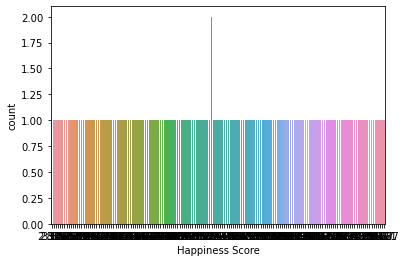

In [22]:
ax=sns.countplot(x='Happiness Score',data=df_visualization_nominal)
print(df_visualization_nominal['Happiness Score'].value_counts())

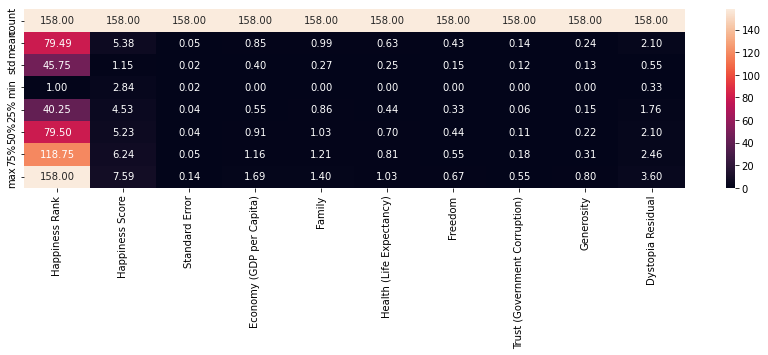

In [25]:
plt.figure(figsize=(12,5))
sns.heatmap(df.describe(),annot=True,linecolor='white',fmt='0.2f')
plt.tight_layout()

<AxesSubplot:xlabel='Happiness Score', ylabel='Dystopia Residual'>

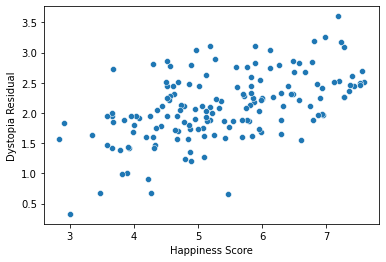

In [26]:
sns.scatterplot(x='Happiness Score',y='Dystopia Residual',data=df)

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

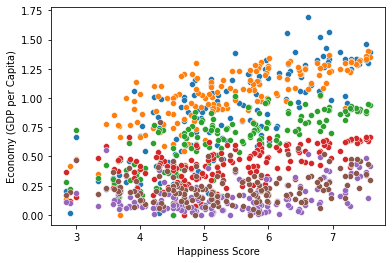

In [28]:
sns.scatterplot(x='Happiness Score',y='Economy (GDP per Capita)',data=df)
sns.scatterplot(x='Happiness Score',y='Family',data=df)
sns.scatterplot(x='Happiness Score',y='Health (Life Expectancy)',data=df)
sns.scatterplot(x='Happiness Score',y='Freedom',data=df)
sns.scatterplot(x='Happiness Score',y='Trust (Government Corruption)',data=df)
sns.scatterplot(x='Happiness Score',y='Generosity',data=df)


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

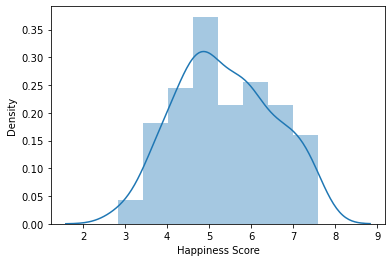

In [29]:
sns.distplot(df['Happiness Score'])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

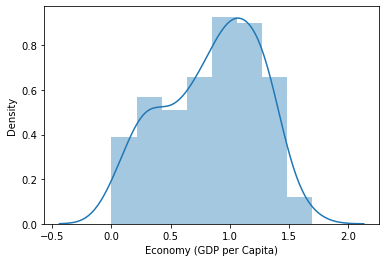

In [31]:
sns.distplot(df['Economy (GDP per Capita)'])


<AxesSubplot:xlabel='Family', ylabel='Density'>

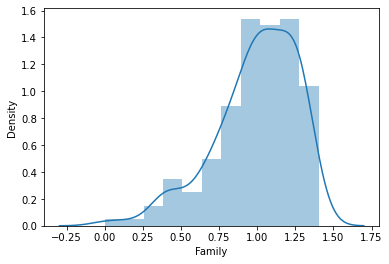

In [32]:
sns.distplot(df['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

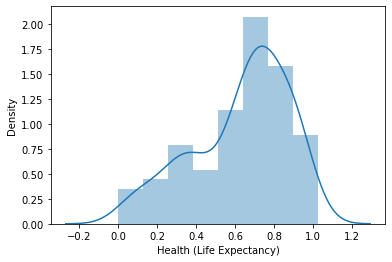

In [33]:
sns.distplot(df['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

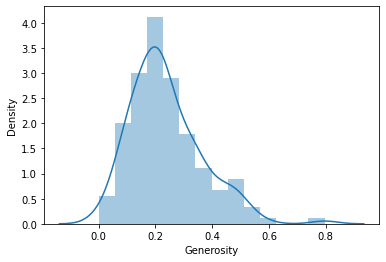

In [34]:
sns.distplot(df['Generosity'])

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

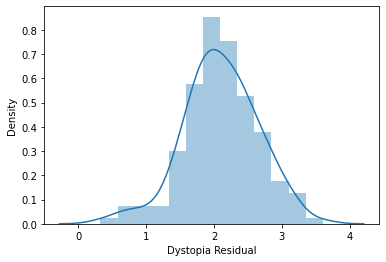

In [35]:
sns.distplot(df['Dystopia Residual'])

In [37]:
df.corr().round(2)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.00,-0.99,0.16,-0.79,-0.73,-0.74,-0.56,-0.37,-0.16,-0.52
Happiness Score,-0.99,1.00,-0.18,0.78,0.74,0.72,0.57,0.40,0.18,0.53
Standard Error,0.16,-0.18,1.00,-0.22,-0.12,-0.31,-0.13,-0.18,-0.09,0.08
Economy (GDP per Capita),-0.79,0.78,-0.22,1.00,0.65,0.82,0.37,0.31,-0.01,0.04
Family,-0.73,0.74,-0.12,0.65,1.00,0.53,0.44,0.21,0.09,0.15
Health (Life Expectancy),-0.74,0.72,-0.31,0.82,0.53,1.00,0.36,0.25,0.11,0.02
Freedom,-0.56,0.57,-0.13,0.37,0.44,0.36,1.00,0.49,0.37,0.06
Trust (Government Corruption),-0.37,0.40,-0.18,0.31,0.21,0.25,0.49,1.00,0.28,-0.03
Generosity,-0.16,0.18,-0.09,-0.01,0.09,0.11,0.37,0.28,1.00,-0.10
Dystopia Residual,-0.52,0.53,0.08,0.04,0.15,0.02,0.06,-0.03,-0.10,1.00


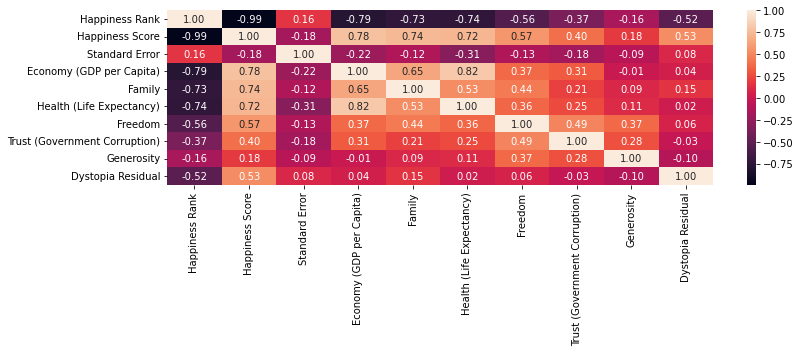

In [38]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,linecolor='white',fmt='0.2f')
plt.tight_layout()

In [39]:
df.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

In [42]:
collist=df.corr().columns.values
ncol=30
nrow=20

In [43]:
collist

array(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'], dtype=object)

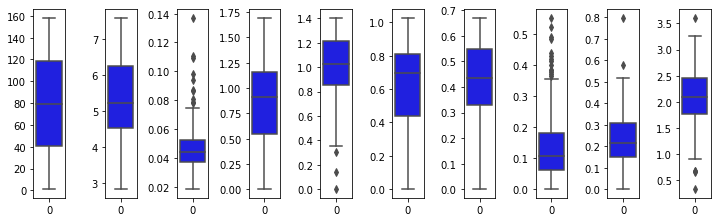

In [44]:
plt.figure(figsize=(ncol,2*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='blue')
    plt.tight_layout()

In [45]:
df.round(2)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52
1,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70
2,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49
3,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47
4,5,7.43,0.04,1.33,1.32,0.91,0.63,0.33,0.46,2.45
...,...,...,...,...,...,...,...,...,...,...
153,154,3.46,0.03,0.22,0.77,0.43,0.59,0.55,0.23,0.67
154,155,3.34,0.04,0.29,0.35,0.32,0.48,0.08,0.18,1.63
155,156,3.01,0.05,0.66,0.47,0.72,0.16,0.19,0.47,0.33
156,157,2.90,0.09,0.02,0.42,0.22,0.12,0.10,0.20,1.83


In [46]:
np.abs(2)

2

In [47]:
from scipy.stats import zscore


In [48]:
zscore(df)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-1.721000,1.937360,-0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,-1.699075,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,-1.677149,1.884792,-0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,-1.655224,1.880411,-0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,-1.633299,1.797179,-0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...
153,1.633576,-1.674055,-0.774917,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925
154,1.655501,-1.783571,-0.662582,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967
155,1.677427,-2.076199,0.132534,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430
156,1.699352,-2.164688,2.263962,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985


In [49]:
z=np.abs(zscore(df))

In [50]:
type(z)

pandas.core.frame.DataFrame

In [51]:
np.where(z>2)

(array([  0,   2,   5,   7,   8,  13,  15,  19,  20,  23,  27,  27,  33,
         36,  39,  40,  64,  71,  73,  80,  80,  90,  90,  93,  95,  96,
         96, 100, 100, 101, 108, 111, 115, 116, 117, 119, 119, 122, 127,
        128, 129, 129, 130, 130, 131, 133, 136, 144, 147, 147, 152, 153,
        153, 154, 155, 155, 156, 156, 156, 156, 156, 157, 157], dtype=int64),
 array([7, 7, 7, 7, 7, 9, 9, 7, 8, 7, 3, 7, 8, 8, 2, 2, 2, 9, 8, 4, 6, 7,
        8, 5, 6, 2, 5, 2, 5, 6, 4, 6, 2, 4, 6, 3, 5, 5, 5, 8, 4, 7, 3, 4,
        9, 9, 6, 9, 4, 5, 4, 7, 9, 4, 1, 9, 1, 2, 3, 4, 6, 1, 4],
       dtype=int64))

In [53]:
z.iloc[2]

Happiness Rank                   1.677149
Happiness Score                  1.884792
Standard Error                   0.854487
Economy (GDP per Capita)         1.192861
Family                           1.361054
Health (Life Expectancy)         0.992229
Freedom                          1.469659
Trust (Government Corruption)    2.842774
Generosity                       0.824293
Dystopia Residual                0.712335
Name: 2, dtype: float64

In [54]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [55]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [56]:
collist[1]

'Happiness Score'

In [57]:
range(0,len(collist))

range(0, 10)

In [58]:
for i in range(1,len(collist)):
    print(collist[i])
    break

Happiness Score


In [59]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [60]:
z.shape

(158, 10)

In [61]:
new=df[(z<3).all(axis=1)]
print('old',df.shape)
print('new',new.shape)
print('dropped',df.shape[0]-new.shape[0])

old (158, 10)
new (149, 10)
dropped 9


In [63]:
loss_percentage=(158-149)/158*100
print(loss_percentage,'%')

5.69620253164557 %


In [64]:
x=new.iloc[:,:-1]
y=new.iloc[:,-1]

In [65]:
from sklearn.preprocessing import power_transform
X=power_transform(x,method='yeo-johnson')

In [66]:
type(X)

numpy.ndarray

In [67]:
X

array([[-2.05151352,  1.82591163, -0.95033703, ...,  1.75498234,
         1.81762514,  0.65957855],
       [-1.99584442,  1.80625026,  0.37856182, ...,  1.44218195,
         0.32967608,  1.56260401],
       [-1.94524081,  1.7804847 , -1.04140135, ...,  1.6160368 ,
         1.95339957,  0.97722591],
       ...,
       [ 1.53128908, -1.78998689, -1.32081011, ..., -1.26539516,
        -0.19284339,  1.13425805],
       [ 1.56626337, -2.05390645, -0.69272644, ...,  0.31812329,
        -0.4344978 , -0.31207994],
       [ 1.60111233, -2.56623507,  2.17876604, ..., -1.84989335,
        -0.14727363, -0.17248608]])

In [68]:
X.ndim

2

In [94]:
x=df.drop('Happiness Score',axis=1)
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [95]:
x_scaled

array([[-1.72099989, -0.80592569,  1.36962124, ...,  2.30965159,
         0.47103971,  0.75825809],
       [-1.69907456,  0.05588945,  1.13522625, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-1.67714922, -0.8544869 ,  1.19286069, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 1.67742676,  0.13253425, -0.45524543, ...,  0.38141902,
         1.85689094, -3.20843049],
       [ 1.69935209,  2.26396166, -2.06756644, ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.72127743,  1.13418227, -1.58633379, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

In [96]:
a.mean()

5.298603547800896e-18

In [72]:
a.std()

1.0

In [76]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x_scaled)

array([[-4.63214183e+00, -6.64772363e-01,  1.80836324e-02, ...,
        -6.04810220e-03, -9.79237023e-02,  1.29388706e-01],
       [-4.11771820e+00, -4.64541110e-01, -7.85503653e-01, ...,
        -1.91367994e-02, -2.15648217e-01,  1.36125001e-01],
       [-4.39202505e+00, -1.06896205e+00,  9.22408713e-02, ...,
        -2.27519344e-02,  1.95400188e-03,  7.98875211e-02],
       ...,
       [ 3.32757366e+00, -1.43033973e+00,  2.00617466e+00, ...,
         3.09695411e-02,  3.39930014e-01,  1.60789405e-01],
       [ 3.27646193e+00, -1.04022708e+00,  1.19734072e+00, ...,
         1.27683590e-01,  1.93082677e-01,  3.22487786e-01],
       [ 4.83989651e+00, -5.82624298e-01, -1.37234458e+00, ...,
        -2.57363574e-01, -3.68178240e-01,  6.83475186e-01]])

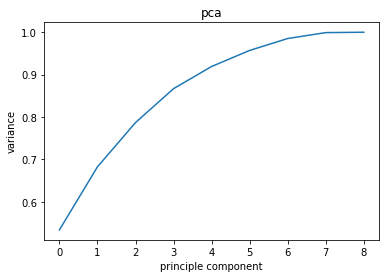

In [98]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principle component')
plt.ylabel('variance')
plt.title('pca')
plt.show()

In [99]:
pca=PCA(n_components=7)
new_pcomp=pca.fit_transform(x_scaled)
princi_comp=pd.DataFrame(new_pcomp,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])
princi_comp

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,-3.906212,0.652965,0.560835,-0.534722,1.021727,0.080850,-0.283257
1,-3.231757,-0.131141,1.105235,0.135019,-1.359488,0.036771,0.087501
2,-3.859335,1.131763,0.813645,-0.649265,1.185171,0.184017,-0.715331
3,-3.705639,0.698539,0.717135,-0.233126,0.523696,0.093966,-0.194219
4,-3.551115,1.103878,0.831703,-0.440509,-0.322142,0.330231,-0.388601
...,...,...,...,...,...,...,...
153,1.048200,3.985857,-0.541569,0.059839,2.826382,-0.619985,-0.354879
154,2.928901,1.267762,-0.393499,-0.832751,0.463658,-0.405608,1.428544
155,2.282220,2.903445,-1.917260,1.169901,-0.717545,2.111847,-0.423873
156,4.519645,-0.077578,0.875677,0.983612,0.494738,1.216583,-0.310531


In [128]:
X = df[['Happiness Rank','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']]
y = df['Happiness Score']
scaler = StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, random_state=10)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print("Training set R^2:", linreg.score(X_train, y_train))
print("Test set R^2:", linreg.score(X_test, y_test))

Training set R^2: 0.9860260898445499
Test set R^2: 0.9832535427772929


In [133]:
from collections import Counter


In [ ]:
Counter(df['Happiness Rank'])

In [140]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
Counter(y_test)

Counter({6.329: 1,
         5.14: 1,
         5.975: 1,
         6.786: 1,
         5.102: 1,
         4.514: 1,
         4.252: 1,
         7.278: 1,
         5.813: 1,
         4.839: 1,
         5.548: 1,
         5.716: 1,
         6.269: 1,
         6.867: 1,
         6.295: 1,
         3.655: 1,
         4.874: 1,
         7.561: 1,
         5.605: 1,
         4.565: 1,
         6.901: 1,
         4.949: 1,
         3.575: 1,
         4.033: 1,
         6.853: 1,
         6.003: 1,
         5.192: 1,
         5.828: 1,
         4.218: 1,
         3.656: 1,
         5.286: 1,
         5.477: 1})